In [1]:
# Hate-Offensive Dataset

import pandas as pd
import numpy as np
import preprocessor as p
import re
import matplotlib.pyplot as plt
import spacy 
import pickle


In [2]:
pd.set_option('display.max_colwidth', -1)

/opt/conda/envs/data3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
train_df = pd.read_csv ("hateSpeech.csv")

In [4]:
len(train_df)

24783

In [5]:
train_df.head(4)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny


In [6]:
train_df.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [7]:
train_df.iloc[2]['tweet']

'!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit'

In [8]:
train_df.iloc[12][['tweet' , 'class']]

tweet    " So hoes that smoke are losers ? " yea ... go on IG
class    1                                                   
Name: 12, dtype: object

In [9]:
offensive_tweets = train_df[train_df['class']==1]

In [10]:
len(offensive_tweets)

19190

In [11]:
offensive_tweets.tail(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24769,25282,3,0,3,0,1,"you lil dumb ass bitch, i ain't fuckin wit chu!.. i got a million, trillion things i'd rather fuckin' do.. than to be fuckin witchu."
24770,25283,3,0,3,0,1,you look like AC Green...bitch don't call here anymore...
24771,25284,3,0,3,0,1,you look like your 12 stop talking about fucking bitches &#9757;
24772,25285,3,0,3,0,1,you might as well gone pussy pop on a stage
24773,25286,3,1,2,0,1,you niggers cheat on ya gf's? smh....
24774,25287,3,0,3,0,1,you really care bout dis bitch. my dick all in yo feelings
24775,25288,3,0,3,0,1,"you worried bout other bitches, you need me for?"
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [12]:
train_df['class'].value_counts()

1    19190
2    4163 
0    1430 
Name: class, dtype: int64

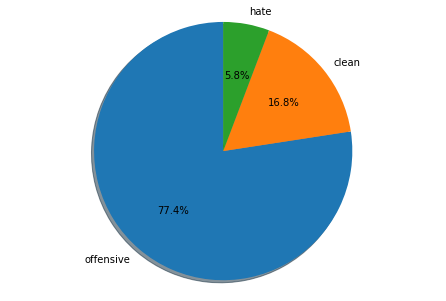

In [22]:
# pie chart 


labels = 'offensive' ,'clean', 'hate'
sizes = [19190, 4163, 1430]
#explode = (0, 0.1 )  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow = True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


#plt.figure(figsize = (8, 8), facecolor = None) 
#plt.imshow(wordcloud) 
#plt.axis("off") 
plt.tight_layout(pad = 0)
#plt.save("word_cloud.jpeg")
#plt.savefig('offensive_words.png')

plt.savefig('OLID_PieChart.svg')  
#plt.savefig('offensive_words.png')

plt.show()

In [13]:
data = train_df[['tweet', 'class']]

In [14]:
data.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,1


In [15]:
offensive_data = data[data['class']==1].sample(n=8983)

In [16]:
offensive_data.head()

,tweet,class
23011,"Xavier a hoe, he never lookin out..",1
10344,"I got a Spanish bitch, her name Nina #paranoid",1
14438,RT @Bob_Heller: Whoever called it the lowest common denominator and not stupid pussy number was probably more mature than me and definitely&#8230;,1
24145,"like ""look at this annoying little 17/18 year old asking for a ride haha fuck her poser bitch ass""",1
11953,It's lame that you can buy clothes that look like real military clothing.\r\nIf you wear it I will make fun of you.\r\nYou're a 4 star bitch.,1


In [17]:
offensive_data.shape

(8983, 2)

In [18]:
clean_data= data[data['class']==2].sample(n= 4163)

In [19]:
clean_data.shape

(4163, 2)

In [28]:
frames = [offensive_data, clean_data]

Data = pd.concat(frames)

In [29]:
Data.shape


(13146, 2)

In [30]:
Data.head(4)

,tweet,class
14651,RT @CharlesLaCross: Gator needs his GAT punk ass bitch,1
4733,"@SoopDevilles You DID. You crushed his ""I got me an EXOTIC bitch!"" dreams.",1
1510,&#8220;@Sam_James3: @khalilreed @aknadnrye don't get on bro http://t.co/qjJvynwQiO&#8221; when bae textin another nigger,1
3388,@Honey_GotBunns bitch you know you won't this &#128526;&#128131;&#128588;&#128514;,1


In [23]:
#df = df.sample(frac=1).reset_index(drop=True)

In [24]:
Data= Data.sample(frac=1).reset_index(drop=True)

In [31]:
Data.shape

(13146, 2)

In [32]:
Data.head(15)

,tweet,class
14651,RT @CharlesLaCross: Gator needs his GAT punk ass bitch,1
4733,"@SoopDevilles You DID. You crushed his ""I got me an EXOTIC bitch!"" dreams.",1
1510,&#8220;@Sam_James3: @khalilreed @aknadnrye don't get on bro http://t.co/qjJvynwQiO&#8221; when bae textin another nigger,1
3388,@Honey_GotBunns bitch you know you won't this &#128526;&#128131;&#128588;&#128514;,1
2779,"@CarelessOne92 weeknd make muzik for the hoes b, im tryna meet these women he be talkin bout",1
1598,"&#8220;@Vabtwin8211: @Vivalaquintaa agreed, eating pussy is so much better&#8221;they both Nasty",1
7916,"Bad bitches from Oakland, she could beeee a model",1
20821,Shut the fuck up and quit being such a pussy hahahah,1
24422,showin more love to bitches fucked on the side,1
1850,"&#8220;@mcdonavins: A nigga who gets alot of bitches is not gonna value you like someone else would, youre just ""another one"" lol.&#8221; Cut that out",1


In [33]:
Data.to_pickle("dataset2_rawtweet.pkl")

In [30]:
# preprocessing the result2 tweets


In [34]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


# some preprocessing using the tweet-preprocessing library


In [36]:
Data.columns

Index(['tweet', 'class'], dtype='object')

In [38]:
def remove_punctuation(words):   
    pattern = '[0-9]'   
    words = p.clean(words)   # first use the python tweets preprocessoer module to make the tweets clean 
    words=words.lower()  # lower case the tweets    
    words = re.sub(pattern, '',words) # removing the digits     
    new_word = re.sub(r'[^\w\s]', '', (words)) 
    new_word = re.sub(r'url','', new_word)
    new_word = re.sub('\n', '', new_word)     
    #new_word = re.sub(r'[\+w]','', new_word)
    new_word = re.sub(r'\b\w{1,2}\b', '', new_word)
    new_word = re.sub(' +', ' ', new_word) # removing the extra spaces in the text
    new_word = new_word.strip()        
    return new_word

In [39]:
Data['text'] = Data['tweet'].apply(lambda x: remove_punctuation(x))

In [41]:
Data.head(5)

,tweet,class,text
14651,RT @CharlesLaCross: Gator needs his GAT punk ass bitch,1,gator needs his gat punk ass bitch
4733,"@SoopDevilles You DID. You crushed his ""I got me an EXOTIC bitch!"" dreams.",1,you did you crushed his got exotic bitch dreams
1510,&#8220;@Sam_James3: @khalilreed @aknadnrye don't get on bro http://t.co/qjJvynwQiO&#8221; when bae textin another nigger,1,dont get bro when bae textin another nigger
3388,@Honey_GotBunns bitch you know you won't this &#128526;&#128131;&#128588;&#128514;,1,bitch you know you wont this
2779,"@CarelessOne92 weeknd make muzik for the hoes b, im tryna meet these women he be talkin bout",1,weeknd make muzik for the hoes tryna meet these women talkin bout


In [44]:
# change the column names
Data_sec = Data[['text', 'class']].rename(columns={'class': 'label'})


In [53]:
# replacing the label 2 with '0' values 
Data_sec['label'].replace(2, 0 ,inplace = True)

In [54]:
Data_sec

,text,label
14651,gator needs his gat punk ass bitch,1
4733,you did you crushed his got exotic bitch dreams,1
1510,dont get bro when bae textin another nigger,1
3388,bitch you know you wont this,1
2779,weeknd make muzik for the hoes tryna meet these women talkin bout,1
...,...,...
20023,now call down your dark and your cold and damned charlie brown,0
6259,actually going see yankee game weird sounds uncles house hour away,0
18540,the only person who likes yellow starburst feel,0
10679,like mock apple but legitimately interested see what their wearable looks like,0


In [55]:
Data_sec.shape

(13146, 2)

In [56]:
Data_sec.head(5)

,text,label
14651,gator needs his gat punk ass bitch,1
4733,you did you crushed his got exotic bitch dreams,1
1510,dont get bro when bae textin another nigger,1
3388,bitch you know you wont this,1
2779,weeknd make muzik for the hoes tryna meet these women talkin bout,1


In [57]:
Data_sec['label'].value_counts()

1    8983
0    4163
Name: label, dtype: int64

In [59]:
Data_sec.to_pickle("second_data_cleaned.pkl")